<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/6_1_using_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)          # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)       # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message hide
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [3]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
embedding_layer = Embedding(1000, 64)

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 1000

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0])

(25000, 1000)
(25000, 1000)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 8)           80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8001      
Total params: 88,001
Trainable params: 88,001
Non-trainable params: 0
_________________________________________________________________



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 4s 182us/step - loss: 0.5665 - acc: 0.7215 - val_loss: 0.3820 - val_acc: 0.8524
Epoch 2/10
20000/20000 [==============================] - 2s 112us/step - loss: 0.2875 

In [7]:
history_dict = history.history
print(history_dict.keys())
print(history_dict.values())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_values([[0.38198373079299924, 0.28724469838142397, 0.2764674132108688, 0.2722946401119232, 0.27917837550640107, 0.2906772419631481, 0.3041268474638462, 0.3152869261741638, 0.3350118238687515, 0.3474410388350487], [0.8524, 0.885, 0.8916, 0.8912, 0.8938, 0.8928, 0.8892, 0.8888, 0.8852, 0.8848], [0.5665209682464599, 0.28753419251441953, 0.21752910659909247, 0.18087758803069592, 0.1550252108991146, 0.13535683562457562, 0.11790770861357451, 0.10396466520726681, 0.09079608785361051, 0.07912556939423085], [0.72155, 0.8907, 0.91785, 0.93205, 0.9427, 0.95145, 0.95865, 0.96415, 0.96935, 0.9738]])


Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

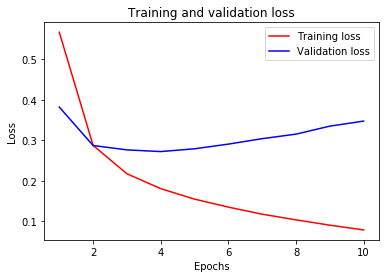

In [8]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

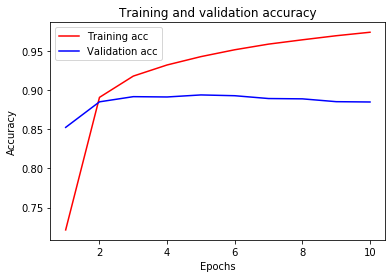

In [9]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()